# Compare SBP multilayers in SNNs and RBMs

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import os

In [2]:
def extract_txt(root_dir, file_dir, mode):
    file = open(os.path.join(root_dir, file_dir), 'r')
    f = file.readlines()[-100:]
    f_list = []
    for i in range(len(f)):
        a = f[i].split(' \n')[0].split(' \t ')
        a_list = [float(a[1]), float(a[3]), float(a[5]), float(a[7]), float(a[9]), float(a[11])] 
        f_list.append(a_list)
    f_list = np.array(f_list)
    error_test = f_list[:,5].tolist()
    error_train = f_list[:,2].tolist()
    if mode == 'test':
        return 1 - min(error_test)
    if mode == 'train':
        return 1- min(error_train)
    
acc_test = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170410_mnist_layers_3_42.txt','test')
# error_test = np.array(error_test)
print(acc_test)

0.9732


## SNNs

### bar

[[0.97356   0.90904   0.098     0.098    ]
 [0.825172  0.441     0.4425228 0.441    ]
 [0.7896652 0.7438972 0.6740776 0.674    ]]
[[5.71314274e-04 1.82603395e-03 1.24126708e-17 1.24126708e-17]
 [2.89824512e-03 0.00000000e+00 2.22742537e-03 0.00000000e+00]
 [4.18744064e-02 6.01571221e-02 3.88000000e-05 0.00000000e+00]]
0.09799999999999998
            3 Layers  4 Layers  5 Layers  6 Layers
MNIST       0.973560  0.909040  0.098000     0.098
NETtalk     0.825172  0.441000  0.442523     0.441
DvsGesture  0.789665  0.743897  0.674078     0.674


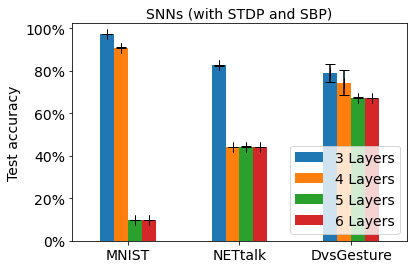

In [5]:
matrix= np.zeros((3,4,5))
#----------------------------------------------
#MNIST
matrix[0][0][0] = 0.974  # 3 layer,mnist
matrix[0][0][1] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T165505_mnist_layers_3_0.txt','test')
matrix[0][0][2] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170410_mnist_layers_3_42.txt','test')
matrix[0][0][3] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170616_mnist_layers_3_512.txt','test')
matrix[0][0][4] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170727_mnist_layers_3_3.txt','test')

matrix[0][1][0] = 1 - 0.088900 # seed 20
matrix[0][1][1] = 1- 0.092200 #seed 0
matrix[0][1][2] = 1- 0.089900 #seed 3
matrix[0][1][3] = 1- 0.089900  #seed 42
matrix[0][1][4] = 1- 0.093900  #seed 512

matrix[0][2][0] = 0.098  # 5 layer, mnist
matrix[0][2][1] = 1-0.902000 #seed 0
matrix[0][2][2] = 1-0.902000 #seed 42
matrix[0][2][3] = 1-0.902000 #seed 512
matrix[0][2][4] = 1-0.902000 #seed 3

matrix[0][3][0] = 0.098  # 6 layer, mnist
matrix[0][3][1] = 1-0.902000 #seed 0
matrix[0][3][2] = 1-0.902000 #seed 42
matrix[0][3][3] = 1-0.902000 #seed 512
matrix[0][3][4] = 1-0.902000 #seed 3
#----------------------------------------------------
#NETTalk
matrix[1][0][0] = 0.828 # 3 layer， nettalk
matrix[1][0][1] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T165505_nettalk_layers_3_0.txt','test')
matrix[1][0][2] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170727_nettalk_layers_3_3.txt','test')
matrix[1][0][3] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170616_nettalk_layers_3_512.txt','test')
matrix[1][0][4] = extract_txt('data/snu/Result_210512_SNNs','log_20210510T170727_nettalk_layers_3_3.txt','test')

matrix[1][1][0] = 0.441 # 4 layer, nettalk
matrix[1][1][1] = 0.441 # seed 0 
matrix[1][1][2] = 0.441 # seed 42
matrix[1][1][3] = 0.441 # seed 512
matrix[1][1][4] = 0.441 # seed 3

matrix[1][2][0] = 0.441 # 5 layer, nettalk
matrix[1][2][1] = 0.446822 # seed 0
matrix[1][2][2] = 0.440672 # seed 42
matrix[1][2][3] = 0.442335 # seed 512
matrix[1][2][4] = 0.441785 # seed 3

matrix[1][3][0] = 0.441 # 6 layer, nettalk
matrix[1][3][1] = 0.441 # seed 0 
matrix[1][3][2] = 0.441 # seed 42
matrix[1][3][3] = 0.441 # seed 512
matrix[1][3][4] = 0.441 # seed 3

#-----------------------------------------------------
#DVSGesture
matrix[2][0][0] = 0.826 # 3 layer, gesture
matrix[2][0][1] = 0.7125 #seed 0
matrix[2][0][2] = 0.780243 #seed 42 
matrix[2][0][3] = 0.806389 #seed 512 
matrix[2][0][4] = 0.823194 #seed 3 

matrix[2][1][0] = 0.674  # 4 layer, gesture
matrix[2][1][1] = 0.790104 #seed 0
matrix[2][1][2] = 0.820903 #seed 42
matrix[2][1][3] = 0.674097 #seed 512
matrix[2][1][4] = 0.760382 #seed 3 

matrix[2][2][0] = 0.674  # 5 layer, gesture
matrix[2][2][1] = 0.674097 #seed 0
matrix[2][2][2] = 0.674097 #seed 42
matrix[2][2][3] = 0.674097 #seed 512
matrix[2][2][4] = 0.674097 #seed 3


matrix[2][3][0] = 0.674  # 6 layer, gesture
matrix[2][3][1] = 0.674  # seed 0
matrix[2][3][2] = 0.674  # seed 42
matrix[2][3][3] = 0.674  # seed 512
matrix[2][3][4] = 0.674  # seed 3

def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
print(matrix.mean(2))
print(matrix.std(2))
print(matrix.min())
df=pd.DataFrame(matrix.mean(2),columns=pd.Index(["3 Layers","4 Layers", "5 Layers", "6 Layers"]),index=pd.Index(["MNIST","NETtalk","DvsGesture"]))
print(df)
ax = df.plot(kind="bar",rot=0,fontsize=14)
plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3]),matrix.mean(2)[0], fmt=" ", yerr=matrix.std(2)[0], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3])+1,matrix.mean(2)[1], fmt=" ", yerr=matrix.std(2)[1], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3])+2,matrix.mean(2)[2], fmt=" ", yerr=matrix.std(2)[2], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax.set_ylabel('Test accuracy',fontsize=14)
ax.legend(loc="lower right",fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax.set_title("SNNs (with STDP and SBP)",fontsize=14)
plt.show()
fig = ax.get_figure()
fig.savefig('Figure/Multiple_SNN.svg')

### weight 

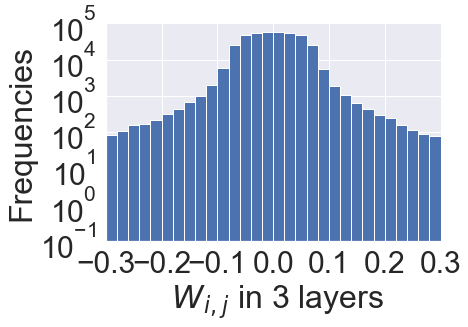

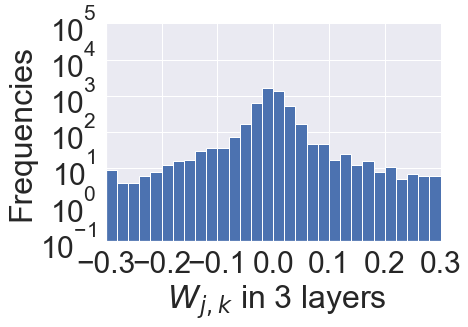

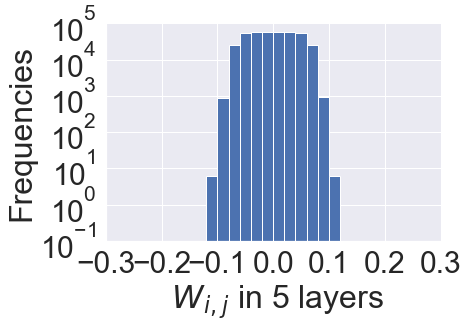

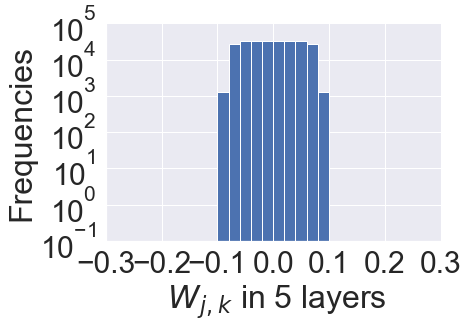

In [48]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import scipy.io as sio

modellist = ['data/snu/Result_210512_SNNs/model/snn_20210510T165505_mnist_layers_3_0.mat',
             'data/snu/Result_210512_SNNs/model/snn_20210510T165505_mnist_layers_5_0.mat']

def getname(name):
    output = []
    if 'SP' in name:
        output.append('SP')
    if 'STDP' in name:
        output.append('STDP')
    if 'layers_3' in name:
        output.append(' in 3 layers')
    if 'layers_5' in name:
        output.append(' in 5 layers')
    return " ".join([o for o in output])
        
for model in modellist:
    data = sio.loadmat(model)['x'][0,0]
    W11 = data['W'][0,0] # 784, 100 
    arrayW11 = W11.flatten()
    plt.rcParams.update({'font.size': 30})
    fig1, ax1 = plt.subplots(1, 1)
    ax1.hist(arrayW11, bins=100, range=[-1,1],log=True)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_xlim((-0.3, 0.3))
    ax1.set_ylim((0.1, 100000))
    xname = r' $W_{i,j}$'+ getname(model)
    plt.xlabel(xname,fontsize=32)
    plt.ylabel('Frequencies',fontsize=32)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    fig1.savefig(model+'_W11.svg')
    plt.show()

    W12 = data['W'][0,1]  # 100, 10
    arrayW12 = W12.flatten()
    plt.rcParams.update({'font.size': 30})
    fig2, ax2 = plt.subplots(1, 1)
    ax2.hist(arrayW12, bins=100, range=[-1,1],log=True)  
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xlim((-0.3, 0.3))
    ax2.set_ylim((0.1, 100000))
    xname = r' $W_{j,k}$'+getname(model)
    plt.xlabel(xname,fontsize=32)
    plt.ylabel('Frequencies',fontsize=32)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    fig2.savefig(model + '_W12.svg')
    plt.show()

## RBMs

            3 Layers  4 Layers  5 Layers  6 Layers
MNIST         0.9716    0.9723    0.9695    0.9246
NETtalk       0.8594    0.8746    0.8331    0.8464
DvsGesture    0.8146    0.8001    0.8398    0.8179


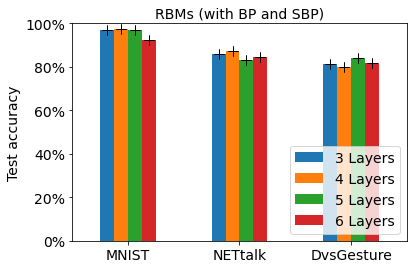

In [8]:
%matplotlib inline
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
def get_names(file_dir):
    for root, dirs, files in os.walk(file_dir):
        return files
def getAccNohup(inpath):
    acclist = []
    with open(inpath, "r") as f:
        datas = f.readlines()
        for line in datas:
            if 'test correct:' in line:
                acc = float(line[line.index('accuracy:')+9:-2])/100
                acclist.append(acc)
    return acclist

path = "data/snu/Result_0630/"
filenames = get_names(path)
matrix_prop = np.zeros((3,11))  # 3 tasks, 0%-100% proportion, only for three layer SNN
matrix_deep = np.zeros((3,4,2)) # 3 tasks, 4 type deep, 2 with or without SBP
for file in filenames:
    nontxtname = file[6:]
    conts = nontxtname.split('_')
    task = conts[0]
    taskid = 0
    if task=='M': taskid=0
    if task=='N': taskid=1
    if task=='G': taskid=2
    layers = int(conts[1])+1
    prop = round(float(conts[2])/0.1) # 0-10
    acc = np.max(getAccNohup(path+file))
    if layers==3:
        matrix_prop[taskid,prop] = acc
        if prop==0 or prop==5:
            matrix_deep[taskid,layers-3,round(prop/5)] = acc
    else:
        matrix_deep[taskid,layers-3,round(prop/5)] = acc

def plot_dataframe(matrix,name,title):
    matrix = [[0.9716,0.9723,0.9695,0.9246],[0.8594,0.8746,0.8331,0.8464],[0.8146,0.8001,0.8398,0.8179]]
    df=pd.DataFrame(matrix,columns=pd.Index(["3 Layers","4 Layers", "5 Layers", "6 Layers"]),index=pd.Index(["MNIST","NETtalk","DvsGesture"]))
    print(df)
    ax = df.plot(kind="bar",rot=0,fontsize=14)
    plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3]),matrix[0], fmt=" ", yerr=0, xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
    plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3])+1,matrix[1], fmt=" ", yerr=0, xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
    plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3])+2,matrix[2], fmt=" ", yerr=0, xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
    ax.set_ylabel('Test accuracy',fontsize=14)
    ax.legend(loc="lower right",fontsize=14)
    ax.set_title(title,fontsize=14)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.ylim((0,1))
    plt.show()
    fig = ax.get_figure()
    fig.savefig(name)
    
matrix_sbp = matrix_deep[:,:,1]
plot_dataframe(matrix_sbp,'Figure/fig_multilayer_revised_SBP.svg','RBMs (with BP and SBP)')

## pseudo BP

[[0.9861 0.988  0.9867 0.9875 0.9873]
 [0.9562 0.9523 0.9507 0.9494 0.9499]
 [0.9207 0.9094 0.919  0.918  0.9225]
 [0.8951 0.886  0.8769 0.8984 0.8971]]
[[0.9106 0.9061 0.9146 0.905  0.9122]
 [0.881  0.8739 0.8787 0.8647 0.8763]
 [0.8423 0.85   0.8519 0.8598 0.8516]
 [0.7809 0.769  0.8128 0.814  0.8107]]
[[0.6875 0.684  0.684  0.6806 0.6806]
 [0.7083 0.7153 0.7083 0.6979 0.6979]
 [0.5903 0.6042 0.5868 0.5903 0.5903]
 [0.5278 0.5243 0.5312 0.5278 0.5278]]
[[0.00065848 0.0024552  0.00452699 0.00815034]
 [0.00363648 0.0056329  0.00557186 0.01880632]
 [0.00257651 0.00674139 0.00606346 0.00218211]]
            3 Layers  4 Layers  5 Layers  6 Layers
MNIST        0.98712   0.95170   0.91792   0.89070
NETtalk      0.90970   0.87492   0.85112   0.79748
DvsGesture   0.68334   0.70554   0.59238   0.52778


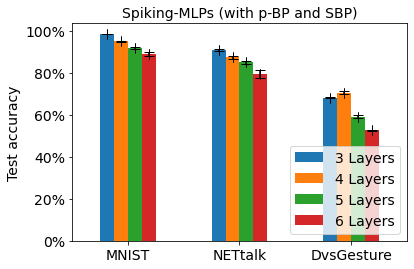

In [4]:
file_dir = './data/pBP_data2'
seeds = ['90', '1234', '3154', '5678', '6666']
def read_filename(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            L.append(file)
    return L
L = read_filename(file_dir)
mnist = np.zeros((4, 5)) # layers*seeds
nettalk = np.zeros((4, 5)) # layers*seeds
dvsgesture = np.zeros((4, 5)) # layers*seeds

for i in range(len(L)):
    f = open(os.path.join(file_dir, L[i]), 'r')
    f = f.readlines()
    acc = []
    for k in range(len(f)):
        if 'test correct:' in f[k]: 
            acc.append(float(f[k].split('y: ')[-1].split('%')[0])/100)
    best_acc = max(acc)
    seed = seeds.index(L[i].split('_')[1])
    layers = int(L[i].split('_')[-1][-1])
    name = L[i].split('_')[2]
    if name == 'MNIST':
        mnist[layers-3, seed] = best_acc
    if name == 'NETTalk':
        nettalk[layers-3, seed] = best_acc
    if name == 'DVSGesture':
        dvsgesture[layers-3, seed] = best_acc
    
print(mnist)
print(nettalk)
print(dvsgesture)

matrix = np.zeros((3,4))
matrix = np.array([mnist.mean(axis=1), nettalk.mean(1), dvsgesture.mean(1)])
matrix_std = np.array([mnist.std(axis=1), nettalk.std(1), dvsgesture.std(1)])
print(matrix_std)
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
df=pd.DataFrame(matrix,columns=pd.Index(["3 Layers","4 Layers", "5 Layers", "6 Layers"]),index=pd.Index(["MNIST","NETtalk","DvsGesture"]))
print(df)
ax = df.plot(kind="bar",rot=0,fontsize=14)#,width=0.5)
plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3]),matrix[0], fmt=" ", yerr=matrix_std[0], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3])+1,matrix[1], fmt=" ", yerr=matrix_std[1], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
plt.errorbar(np.array([-0.0625*3,-0.0625,0.0625,0.0625*3])+2,matrix[2], fmt=" ", yerr=matrix_std[2], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax.set_ylabel('Test accuracy',fontsize=14)
ax.legend(loc="lower right",fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax.set_title("Spiking-MLPs (with p-BP and SBP)",fontsize=14)
plt.show()
fig = ax.get_figure()
# fig.savefig('Figure/fig_multilayer_pBP.svg')

# Test accuracies with SBP or with zero gradients

## zero gradients

Text(0.5, 1.0, 'Three-layer SNNs with pseudo BP')

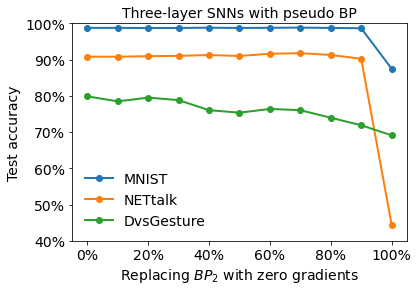

In [4]:
matrix_prop_zero= np.zeros((3,11))

matrix_prop_zero[0,:] = [0.9876,0.9875,0.9872,0.9873,0.9880,0.9874,0.9877,0.9883,0.9874,0.9865,0.8748]
matrix_prop_zero[1,:] = [0.9081,0.9079,0.9095,0.9103,0.9126,0.9100,0.9162,0.9177,0.9128,0.9023,0.4440]
matrix_prop_zero[2,:] = [0.7986,0.7847,0.7951,0.7882,0.7604,0.7535,0.7639,0.7604,0.7396,0.7188,0.6910]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
tasks = ['MNIST','NETtalk','DvsGesture']
for i in range(3):
    templist = matrix_prop_zero[i,:]
    ax.plot(range(len(templist)),templist,'o-',linewidth=2,label=tasks[i])
plt.xticks([0,2,4,6,8,10],['0%','20%','40%','60%','80%','100%'])
ax.legend(loc='best',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.ylim((0.4, 1))
plt.xlabel('Replacing $BP_2$ with zero gradients',fontsize=14)
plt.ylabel('Test accuracy',fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.title('Three-layer SNNs with pseudo BP',fontsize=14)
# fig.savefig('fig_three_layer_replace_BP_with_zero_gradient__1.svg') #save figure

## SBP

Text(0.5, 1.0, 'Three-layer SNNs with pseudo BP')

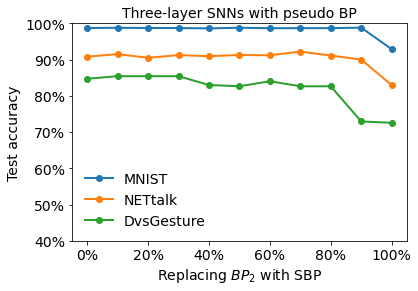

In [5]:
matrix_prop= np.zeros((3,11))

matrix_prop[0,:] = [0.9871,0.9878,0.9872,0.9870,0.9862,0.9879,0.9866,0.9868,0.9868,0.9881,0.9288]
matrix_prop[1,:] = [0.9081,0.9151,0.9049,0.9125,0.9094,0.9127,0.9119,0.9221,0.9111,0.9002,0.8295]
matrix_prop[2,:] = [0.8472,0.8542,0.8542,0.8542,0.8299,0.8264,0.8403,0.8264,0.8264,0.7292,0.7257]

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
tasks = ['MNIST','NETtalk','DvsGesture']
for i in range(3):
    templist = matrix_prop[i,:]
    ax.plot(range(len(templist)),templist,'o-',linewidth=2,label=tasks[i])
plt.xticks([0,2,4,6,8,10],['0%','20%','40%','60%','80%','100%'])
ax.legend(loc='best',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.ylim((0.4, 1))
plt.xlabel('Replacing $BP_2$ with SBP',fontsize=14)
plt.ylabel('Test accuracy',fontsize=14)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.title('Three-layer SNNs with pseudo BP',fontsize=14)
# fig.savefig('fig_three_layer_replace_BP_with_SBP__1.svg') #save figure